In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping


Classification

In [2]:
from data.load_data import load_monk
path = os.getcwd()
file = '/data/monks-2.train'
file_test = '/data/monks-2.test'

labels = ['class','x1','x2','x3','x4','x5','x6']


X_train, y_train = load_monk(path+file)
X_test, y_test = load_monk(path+file_test)

print(X_train.shape)
print(y_train.shape)

(169, 6)
(169, 1)


0.7546296296296297


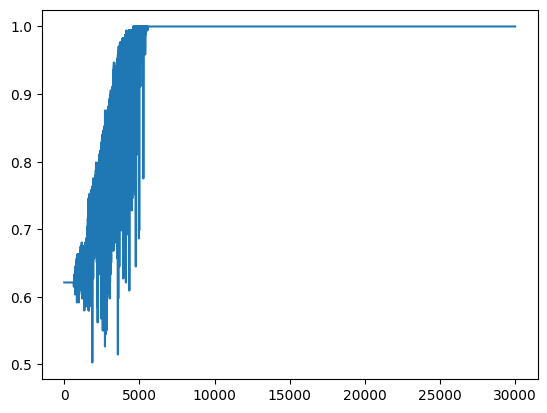

In [3]:
mlp = MLP([12,12], 6, 1, task = "classification", activation_function = "sigmoid")

mlp.fit(X_train, y_train, n_epochs = 30000, batch_size = 40, error = "NLL", step = 1, regularization = 'l2')

y_pred = mlp.predict(X_test)

acc = get_metric_instance("accuracy")
print(acc(y_test, y_pred))
plt.plot(mlp.learning_curve)

Regression

In [4]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import os
from data.load_data import load_monk
from src.MetricFunctions import get_metric_instance
from src.MLP import MLP
from src.GridSearch import GridSearch, RandomGridsearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from src.EarlyStopping import EarlyStopping
path = os.getcwd()
file = '/data/ML-CUP22-TR.csv'

labels = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','y1','y2']

TR = pd.read_csv(path + file, sep = ',', header = None, usecols=range(1,12), \
                 names = labels, skiprows = 7)

TR = TR.to_numpy()

np.random.shuffle(TR)

TR = np.split(TR, [9], axis = 1)

X = TR[0]
y_true = TR[1]

print(y_true)
print(X.shape)
print(y_true.shape)

n_epochs = 500

[[ 14.682788 -29.868738]
 [ 23.436613 -26.585715]
 [ 24.132073 -26.181679]
 ...
 [  4.525337 -25.257965]
 [  4.851846 -19.442397]
 [  4.312512 -24.531587]]
(1492, 9)
(1492, 2)


5.223659872512793


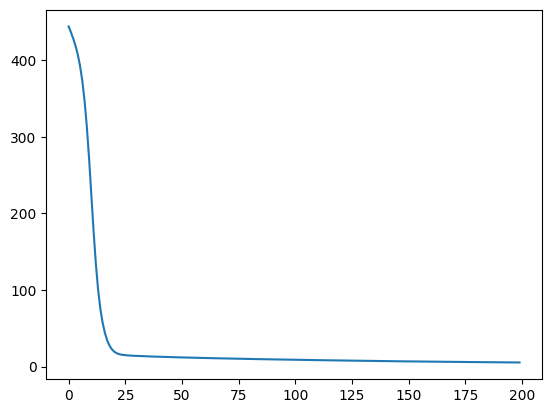

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)
mlp = MLP([9], 9, 2, task = "regression", activation_function = "relu")
mlp.fit(X_train, y_train, n_epochs = 200, batch_size = 200, error = "MSE", step = 0.001, momentum = 0, regularization = 'l2',
alpha_l2 = 0.01)
y_pred = mlp.predict(X_test)
mse = get_metric_instance("mse")
print(mse(y_test, y_pred))
plt.plot(mlp.learning_curve)

/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Layers.py:221: RuntimeWarning: overflow encountered in matmul
  grad_input = np.matmul(grad_output, weights.T)
/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Layers.py:190: RuntimeWarning: overflow encountered in matmul
  return np.matmul(input, self._weights) + self._biases # broadcasting
/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Layers.py:222: RuntimeWarning: invalid value encountered in matmul
  grad_weights = np.matmul(self._input.T, grad_output) + self.regularization_function.derivative(weights)
/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Layers.py:299: RuntimeWarning: invalid value encountered in multiply
  return grad_output * self.activation.derivative(self._input)
/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Optimizers.py:13: RuntimeWarning: invalid value encountered in multiply
  return -self.step * grad_weigths + self.momentum * last_weights_update, -self.step * grad_biases + self.momentum * last_biases_update


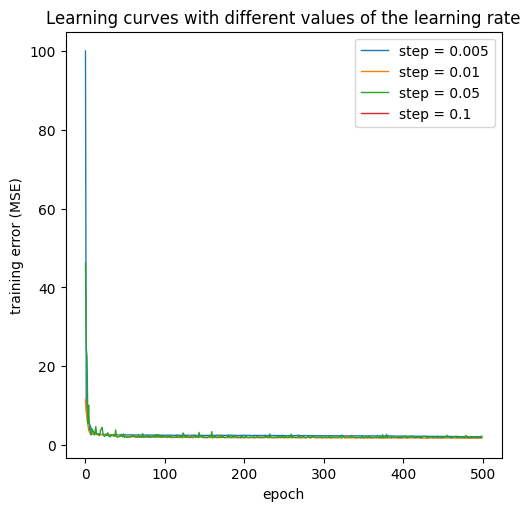

In [6]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')

for step in [0.005, 0.01, 0.05, 0.1]:
    mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step)
    ax.plot(range(n_epochs), mlp.learning_curve, label = 'step = ' + str(step), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different values of the learning rate")  
ax.legend()

/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Layers.py:222: RuntimeWarning: overflow encountered in matmul
  grad_weights = np.matmul(self._input.T, grad_output) + self.regularization_function.derivative(weights)
/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/Layers.py:190: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(input, self._weights) + self._biases # broadcasting
/Users/dre/Desktop/GitRepo/DreRnc/MLx2/src/RegularizationFunctions.py:47: RuntimeWarning: invalid value encountered in multiply
  return self.alpha_l1 * np.sign(w) + 2 * self.alpha_l2 * w


ValueError: x, y, and format string must not be None

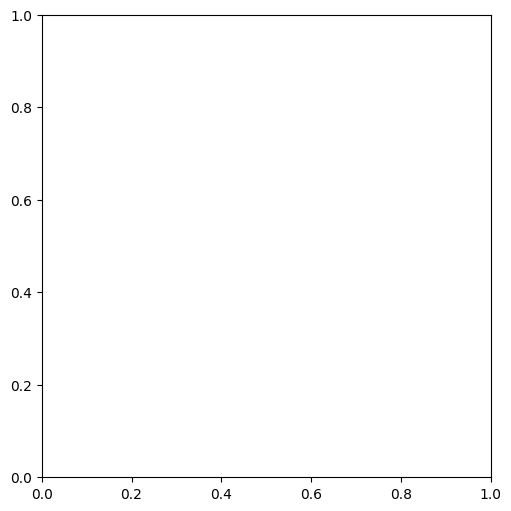

In [7]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for alpha_l2 in [0, 0.005, 0.01, 0.05, 0.1]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 50, step = step, regularization = "L2", alpha_l2 = alpha_l2)
    ax.plot(range(n_epochs), learning_curve, label = 'alpha L2 = ' + str(alpha_l2), linewidth = 1)

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')  
ax.set_title("Learning curves with different regularization")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5
for momentum in [0, 0.1, 0.3]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different momentum")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.1
for batch_size in [1, 100]:
    learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = batch_size, step = step)
    ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'batch_size = ' + str(batch_size))

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')   
ax.set_title("Learning curves with different batch size")  
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
step = 0.5

momentum = 0
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

momentum = 0.2
learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum))

learning_curve = mlp.fit(X, y_true, n_epochs = n_epochs, batch_size = 100, step = step, momentum = momentum, Nesterov = True)
ax.plot(range(n_epochs), learning_curve, linewidth = 1, label = 'momentum = ' + str(momentum) + ' (Nesterov)')

ax.set_xlabel('epoch')  
ax.set_ylabel('training error (MSE)')    
ax.legend()

In [ ]:
n_classes = 5
input_size = 5
mlp = MLP([5, 5], input_size, n_classes, task = "classification")